## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 75 using Decision Tree 

Nitansh Jain  102017025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
# checking if any null values are present
print(spotify_df.isnull().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [4]:
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [5]:
spotify_df.drop_duplicates(subset=['title','artist'],inplace=True)
spotify_df.drop(spotify_df[spotify_df['title'] == 'Adele'].index, inplace=True)
print(spotify_df.shape)

(587, 15)


In [6]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [7]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'Unnamed: 0'], axis=1, inplace=True)
spotify_df.head()


,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [8]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(spotify_features['artist'])
spotify_features['artist'] = le_artist.transform(spotify_features['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_features['genre'])
spotify_features['genre'] = le_genre.transform(spotify_features['genre'])


In [9]:
# # dropping added from dataset
# spotify_df.drop(['added', 'title','top year'], axis=1, inplace=True)
# spotify_df.head()

In [10]:
X = spotify_df.drop(['popularity'], axis=1)
Y = np.where(spotify_df['popularity'] >= 70, 1, 0)

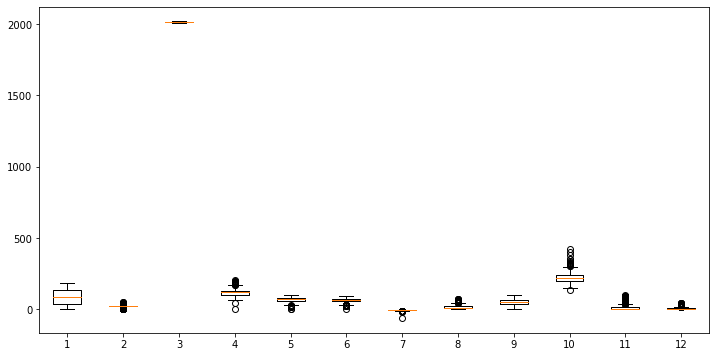

In [11]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(X)
plt.show()

In [12]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X.loc[:,'year':'spch'] = scaler.fit_transform(X.loc[:,'year':'spch'])
X[0:2]

,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,174,46,0.0,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333
1,49,27,0.0,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167


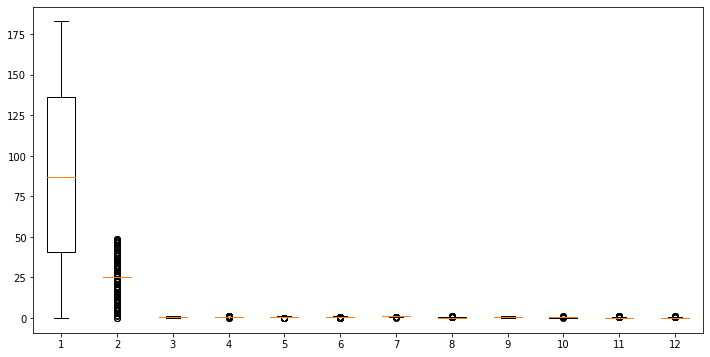

In [13]:
# after normalization of data using min_max scaler
# xticks_values = [0, 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
# print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(X)
# plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
poplTree = DecisionTreeClassifier(criterion='entropy' , max_depth=3, random_state=0)

In [16]:
poplTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
predPoplTree = poplTree.predict(x_test)

In [18]:
print(predPoplTree[0:5])
print(y_test[0:5])

[1 0 1 1 1]
[1 1 1 0 1]


In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predPoplTree))

DecisionTrees's Accuracy:  0.6113207547169811


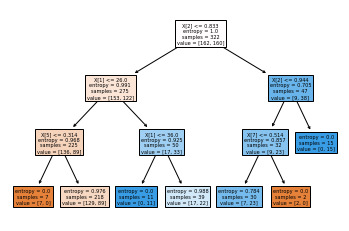

In [20]:
import sklearn.tree as tree

fig = tree.plot_tree(poplTree, filled=True)
plt.show()

In [21]:
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(n_estimators=20, random_state=7)
#Train the model using the training sets
clf3.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf3.predict(x_test)    


In [22]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.630188679245283


In [23]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=3, random_state=0)
#Train the model using the training sets
clf1.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(x_test)    

In [24]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6226415094339622


In [25]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [26]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6
